<a href="https://colab.research.google.com/github/Someshwarms/car-price-predictions/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
%matplotlib inline

**Loading the flight dataset and you can dowload the dataset from this link:https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.shape

(301, 9)

**Lets check there is null values in the dataset**

In [ ]:
df.isnull().sum()
#No null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Lets make all the categorical data into numerical data and lets handel year column plus visualiazation**:

In [ ]:
df['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

In [ ]:
df['Current_Year']=2021

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [ ]:
df['no_of_year_usedcar']=df['Current_Year']-df['Year']

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_year_usedcar
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
df.drop(['Car_Name','Year','Selling_Price','Current_Year'],axis=1,inplace=True)

In [ ]:
df.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year_usedcar
0,5.59,27000,Petrol,Dealer,Manual,0,7
1,9.54,43000,Diesel,Dealer,Manual,0,8
2,9.85,6900,Petrol,Dealer,Manual,0,4
3,4.15,5200,Petrol,Dealer,Manual,0,10
4,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Fuel_Type'].replace(to_replace="Petrol",value=1,inplace=True)
df['Fuel_Type'].replace(to_replace="Diesel",value=2,inplace=True)
df['Fuel_Type'].replace(to_replace="CNG",value=3,inplace=True)

In [ ]:
df['Fuel_Type'].value_counts()

1    239
2     60
3      2
Name: Fuel_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


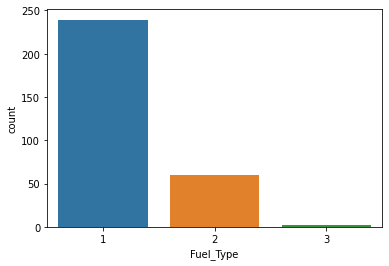

In [ ]:
sns.countplot('Fuel_Type',data=df)

In [ ]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


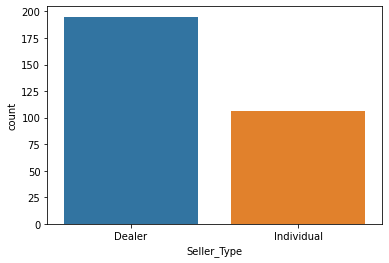

In [ ]:
sns.countplot('Seller_Type',data=df)

In [ ]:
df['Seller_Type'].replace(to_replace="Dealer",value=0,inplace=True)
df['Seller_Type'].replace(to_replace="Individual",value=1,inplace=True)

In [ ]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


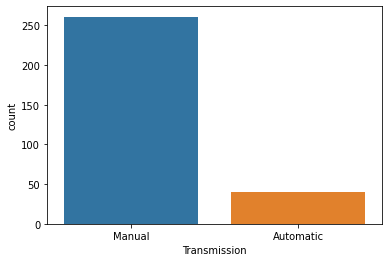

In [ ]:
sns.countplot('Transmission',data=df)

In [ ]:
df['Transmission'].replace(to_replace="Manual",value=0,inplace=True)
df['Transmission'].replace(to_replace="Automatic",value=1,inplace=True)

In [ ]:
df['Transmission'].value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [ ]:
df.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year_usedcar
0,5.59,27000,1,0,0,0,7
1,9.54,43000,2,0,0,0,8
2,9.85,6900,1,0,0,0,4
3,4.15,5200,1,0,0,0,10
4,6.87,42450,2,0,0,0,7


In [ ]:
color_dict1 = dict({1:'green',2:'orange',3:'red'})

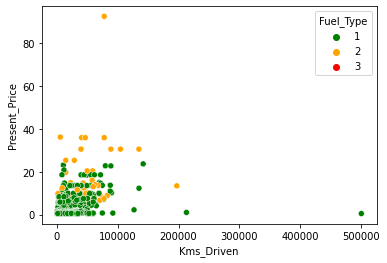

In [ ]:
sns.scatterplot(x='Kms_Driven',y='Present_Price',hue='Fuel_Type',data=df,palette=color_dict1, legend='full')

In [ ]:
color_dict2 = dict({0:'green',1:'red'})

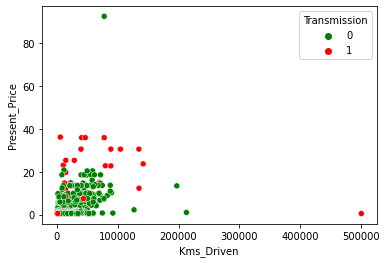

In [ ]:
sns.scatterplot(x='Kms_Driven',y='Present_Price',hue='Transmission',data=df,palette=color_dict2, legend='full')

In [ ]:
color_dict3 = dict({0:'orange',1:'blue'})

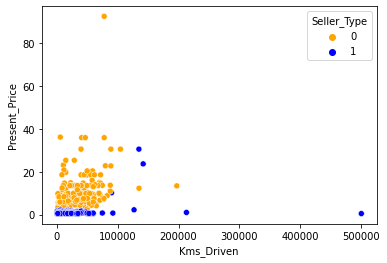

In [ ]:
sns.scatterplot(x='Kms_Driven',y='Present_Price',hue='Seller_Type',data=df,palette=color_dict3, legend='full')

In [ ]:
color_dict4 = dict({0:'Purple',1:'red',3:'blue'})

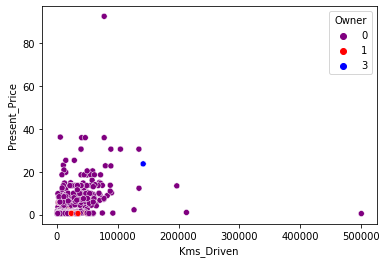

In [ ]:
sns.scatterplot(x='Kms_Driven',y='Present_Price',hue='Owner',data=df,palette=color_dict4, legend='full')

**Now we will divide the dataset into independent and dependent feature and drop all those which is not required**

In [ ]:
X=df.drop('Present_Price',axis=1)
y=df['Present_Price']

In [ ]:
X.shape

(301, 6)

In [ ]:
X.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year_usedcar
0,27000,1,0,0,0,7
1,43000,2,0,0,0,8
2,6900,1,0,0,0,4
3,5200,1,0,0,0,10
4,42450,2,0,0,0,7


In [ ]:
y.shape

(301,)

In [ ]:
y.head()

0    5.59
1    9.54
2    9.85
3    4.15
4    6.87
Name: Present_Price, dtype: float64

**Using train_test_split we will divide the dataset into training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(240, 6)

In [ ]:
y_test.shape

(61,)

**We will use different algorithms for training and testing to see which will give the best result and which ever algorithm will give the best result that will be selected for predictions and to check the result we will use MSE,MAE,and RMSE.**

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([ 0.7769    ,  5.81936571, 11.3781    ,  0.7401    ,  9.0656    ,
       10.9412    ,  0.86902   ,  1.80562667,  1.01923667,  7.80431   ,
       10.3705    ,  0.58512   , 10.6963    ,  0.6168    ,  9.79315   ,
        9.4227    ,  0.99189333, 10.3307    ,  1.0538    ,  1.0694    ,
        1.08673333, 10.1458    ,  8.56155   ,  5.4599    ,  0.9673    ,
        5.5495    , 13.1665    ,  6.6341    ,  1.0308    ,  0.9437    ,
        2.72509   , 11.5339    ,  0.8336    ,  8.1837    , 11.6957    ,
        6.57843333, 15.8258    ,  7.5339    , 13.1665    ,  5.9342    ,
       10.827     , 20.2315    ,  7.1255    ,  1.12396   , 11.2351    ,
        0.58122   ,  6.9723    , 29.2996    ,  8.1658    ,  6.7048    ,
        7.69525   ,  1.4841    , 31.6126    , 23.714     , 13.0062    ,
        9.5492    ,  7.7156    , 12.5899    ,  6.5346    , 12.4294    ,
        0.81016   ])

In [ ]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MSE:",mean_absolute_error(y_pred,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

MSE: 14.736644556761542
MSE: 2.438167119437937
MSE: 3.8388337495600853


In [ ]:
metrics.r2_score(y_test,y_pred)

0.7078188308060066

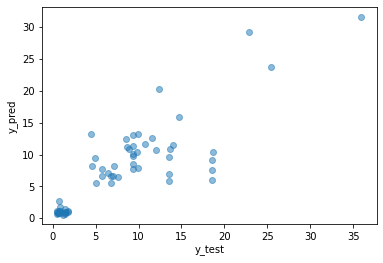

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
model1=AdaBoostRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [ ]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MSE:",mean_absolute_error(y_pred1,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred1,y_test)))

MSE: 15.20868619532861
MSE: 2.86840887164164
MSE: 3.899831559866222


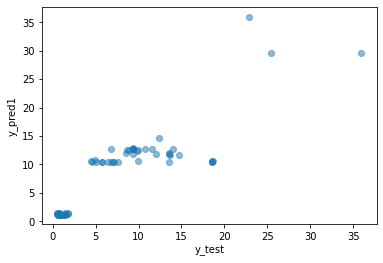

In [ ]:
plt.scatter(y_test, y_pred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [ ]:
model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [ ]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MSE:",mean_absolute_error(y_pred2,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred2,y_test)))

MSE: 14.071801530203759
MSE: 2.2740255079538736
MSE: 3.7512399990141607


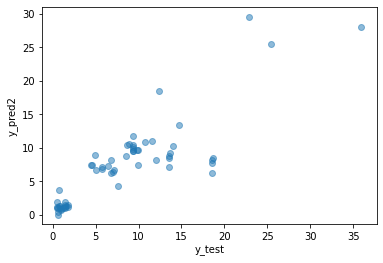

In [ ]:
plt.scatter(y_test, y_pred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [ ]:
mn=MinMaxScaler()
X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

In [ ]:
model3=LinearRegression()
model3.fit(X_train_scaled,y_train)
y_pred3=model3.predict(X_test_scaled)

In [ ]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MSE:",mean_absolute_error(y_pred3,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred3,y_test)))

MSE: 23.30634265520476
MSE: 3.5984675396105463
MSE: 4.827664306391317


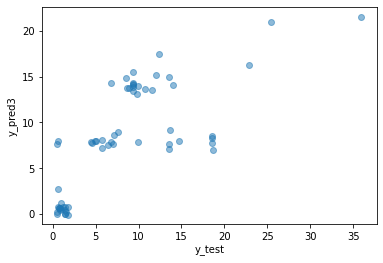

In [ ]:
plt.scatter(y_test, y_pred3, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [ ]:
model4=SVR(kernel="rbf")
model4.fit(X_train_scaled,y_train)
y_pred4=model4.predict(X_test_scaled)

In [ ]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MSE:",mean_absolute_error(y_pred4,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred4,y_test)))

MSE: 27.11855908737026
MSE: 2.805394148597545
MSE: 5.207548279888556


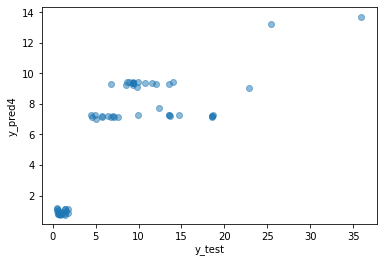

In [ ]:
plt.scatter(y_test, y_pred4, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [ ]:
X_test

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year_usedcar
177,24000,1,1,1,0,5
289,10980,1,0,0,0,5
228,60000,2,0,0,0,9
198,35000,1,1,0,1,10
60,40001,1,0,0,0,8
...,...,...,...,...,...,...
234,4492,1,0,0,0,6
296,33988,2,0,0,0,5
281,50456,1,0,0,0,15
285,15059,1,0,1,0,5


**Conclusion: From above i tried too many different types of algorithms to check which is performing best out of all of them RandomForest Regressor gaved the best result so we will used random forest regressor model for prediction to improve the result more we can use Hyper Parameter Tuning or Optimization technique like Randomizedsearchcv or Gridsearchcv**

In [ ]:
prediction=model.predict([[24000	,1	,1	,1	,0	,5]])
print("Used Car Price Prediction in ruppes:",prediction)

Used Car Price Prediction in ruppes: [0.7769]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
